In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps, ImageEnhance
from src.filter_reconst import filter_reconstruction
from src.V1_reconst import generate_Y, reconstruct, color_reconstruct
import pandas as pd
import seaborn as sns
import time
import os.path

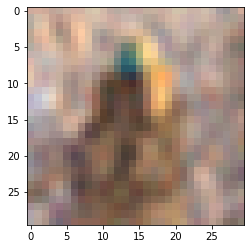

In [3]:
image_path = 'image/city_part2.png'
num_cell = 200
cell_size = 7
sparse_freq = 2
# alpha = 0.3


img = Image.open(image_path)
img_arr = np.asarray(img)

plt.imshow(color_reconstruct(img_arr, num_cell, cell_size, sparse_freq))


# dim = img_arr.shape

# i = 0
# dim = img_arr[:,:,i].shape

# W = V1_weights(num_cell, dim, cell_size, sparse_freq) 
# final = np.zeros(img_arr.shape)

# # with same V1 cells generated, reconstruct images for each of 3 rgb arrays and append to final
# while (i < 3):
#     img_arr_pt = img_arr[:,:,i]
#     img_arr_pt_dim = img_arr_pt.shape
#     n_pt, m_pt = img_arr_pt_dim
#     y = generate_Y(W, img_arr_pt)
#     W_model = W.reshape(num_cell, n_pt, m_pt)
#     theta, reconst, s = reconstruct(W_model, y, alpha)
#     final[:,:,i] = reconst
#     i+=1
    
# final = np.round(final).astype(int)
# final[final < 0] = 0
# final[final > 255] = 255
# final = final.astype(int)

# plt.imshow(img_arr)
# plt.title("original image")
# plt.show()

# plt.imshow(final, vmin = 0, vmax=255)
# plt.title("reconstructed RGB image")
# plt.show()


In [103]:
np.max(final)

656

In [73]:
np.min(img_arr - final)

-529.6951867220534

In [74]:
img_arr[0:, ]

array([[[192, 167, 154],
        [193, 165, 149],
        [200, 168, 150],
        ...,
        [176, 165, 160],
        [155, 141, 140],
        [165, 150, 148]],

       [[185, 164, 155],
        [203, 176, 157],
        [229, 189, 163],
        ...,
        [175, 152, 139],
        [191, 162, 147],
        [187, 165, 154]],

       [[186, 165, 156],
        [195, 172, 154],
        [238, 194, 162],
        ...,
        [180, 153, 138],
        [185, 145, 121],
        [197, 161, 136]],

       ...,

       [[168, 147, 138],
        [195, 176, 166],
        [163, 145, 143],
        ...,
        [161, 144, 144],
        [147, 130, 132],
        [157, 135, 136]],

       [[200, 180, 171],
        [211, 191, 187],
        [158, 137, 139],
        ...,
        [171, 146, 140],
        [152, 132, 131],
        [162, 141, 134]],

       [[201, 180, 172],
        [192, 172, 166],
        [147, 128, 127],
        ...,
        [152, 123, 112],
        [139, 118, 111],
        [113,  97,  95]]

In [75]:
np.max(final)

701.6951867220534

In [76]:
img_arr_grey = ImageOps.grayscale(img)
img_arr_grey = np.asarray(img_arr_grey)

In [77]:
filter_reconstruction(num_cell = num_cell, img_arr = img_arr_grey, 
                                          sparse_freq = sparse_freq, cell_size = cell_size, alpha = alpha, filter_dim = (10, 10))

(40, 40)
iteration 3
iteration 6
iteration 9
iteration 12
iteration 15


/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase th

array([[173.06270065, 172.88450331, 176.21004111, 184.79790697,
        178.63988431, 165.61085871, 191.93880409, 189.87931381,
        224.24015751, 189.93588499, 179.56677635, 187.33011292,
        181.92810718, 183.78440765, 179.0118928 , 178.90855992,
        186.85916282, 189.07524409, 193.84523925, 194.65310273,
        189.56589049, 188.8822059 , 187.64822991, 183.97721718,
        179.55186907, 170.5369268 , 173.85020251, 163.73152458,
        149.13180415, 152.3467739 ],
       [170.29750251, 178.96954593, 198.97045433, 190.96033367,
        162.07671459, 154.19876333, 193.73534544, 194.14549555,
        204.26795885, 185.43907776, 180.69921202, 180.53663221,
        178.94156572, 189.7058116 , 193.25464963, 186.33727916,
        167.22151719, 166.04938899, 176.99258416, 195.18018172,
        188.30879881, 187.38541493, 188.86561524, 192.63371221,
        191.90286751, 179.06524425, 174.62317627, 165.72414576,
        162.59723926, 171.7891147 ],
       [168.99155138, 177.5875

In [78]:
final.shape

(30, 30, 3)

In [79]:
img_arr.shape

(30, 30, 3)

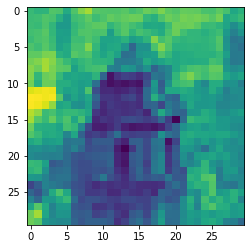

In [83]:
plt.imshow(img_arr[:,:,2])

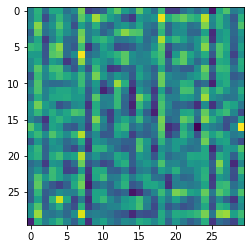

In [70]:
plt.imshow(final[:,:,2])